Original Dataset:
   Day   Outlook  Temp Humidity    Wind PlayTennis
1  D1     Sunny   Hot     High    Weak         No
2  D2     Sunny   Hot     High  Strong         No
3  D3  Overcast   Hot     High    Weak        Yes
4  D4      Rain  Mild     High    Weak        Yes
5  D5      Rain  Cool   Normal    Weak        Yes

Encoded Dataset:
   Day  Outlook  Temp  Humidity  Wind  PlayTennis
1  D1        2     1         0     1           0
2  D2        2     1         0     0           0
3  D3        0     1         0     1           1
4  D4        1     2         0     1           1
5  D5        1     0         1     1           1

Test Predictions: [0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



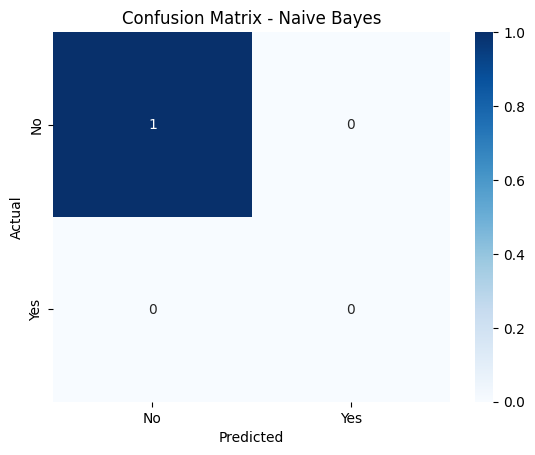


Predicted PlayTennis for ['Sunny' 'Cool' 'High' 'Weak'] is: Yes

--- Inference / Analysis ---
1. Dataset: PlayTennis (weather-related decision dataset).
2. Applied Label Encoding to convert categorical features into numerical format.
3. Gaussian Naive Bayes was trained on 80% of the data and tested on the remaining 20%.
4. Accuracy Achieved: 100.00%
5. Confusion matrix and classification report show model performance.
6. New sample ['Sunny', 'Cool', 'High', 'Weak'] was classified as: Yes.
7. Naive Bayes works well when features are conditionally independent.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 1: Load Dataset ---
df = pd.read_csv('PlayTennis.csv')
df.index = range(1, len(df) + 1)
print("Original Dataset:\n", df)

# --- Step 2: Preprocessing (Label Encoding) ---
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

df['Outlook'] = le_outlook.fit_transform(df['Outlook'])
df['Temp'] = le_temp.fit_transform(df['Temp'])
df['Humidity'] = le_humidity.fit_transform(df['Humidity'])
df['Wind'] = le_wind.fit_transform(df['Wind'])
df['PlayTennis'] = le_play.fit_transform(df['PlayTennis'])  # Yes=1, No=0

print("\nEncoded Dataset:\n", df)

# --- Step 3: Split Data ---
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]
y = df['PlayTennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train Naive Bayes Model ---
model = GaussianNB()
model.fit(X_train, y_train)

# --- Step 5: Evaluate on Test Data ---
y_pred = model.predict(X_test)
print("\nTest Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# --- Step 6: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# --- Step 7: Predict a New Sample ---
new_sample = pd.DataFrame([['Sunny', 'Cool', 'High', 'Weak']],
                          columns=['Outlook', 'Temp', 'Humidity', 'Wind'])

new_sample_encoded = pd.DataFrame({
    'Outlook': le_outlook.transform(new_sample['Outlook']),
    'Temp': le_temp.transform(new_sample['Temp']),
    'Humidity': le_humidity.transform(new_sample['Humidity']),
    'Wind': le_wind.transform(new_sample['Wind'])
})

new_pred = model.predict(new_sample_encoded)
new_label = le_play.inverse_transform(new_pred)
print(f"\nPredicted PlayTennis for {new_sample.values[0]} is: {new_label[0]}")

# --- Step 8: Inference / Analysis ---
print("\n--- Inference / Analysis ---")
print("1. Dataset: PlayTennis (weather-related decision dataset).")
print("2. Applied Label Encoding to convert categorical features into numerical format.")
print("3. Gaussian Naive Bayes was trained on 80% of the data and tested on the remaining 20%.")
print(f"4. Accuracy Achieved: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("5. Confusion matrix and classification report show model performance.")
print(f"6. New sample ['Sunny', 'Cool', 'High', 'Weak'] was classified as: {new_label[0]}.")
print("7. Naive Bayes works well when features are conditionally independent.")